In [ ]:
import numpy as np
from scipy.stats import norm

Eddington_report=1.61
Eddington_error=0.40

Cromellelin_report=1.98
Cromellelin_error=0.16

#now liklihood Einstein

theta1=1.74  #Einstein predicted
#Eddington one
G1=norm.pdf(Eddington_report, loc=theta1, scale=Eddington_error)

#Cromellelin
G2=norm.pdf(Eddington_report, loc=theta1, scale=Cromellelin_error)

Combine_likelihood_Einstein=G1*G2  #as both the experiment done independently so we can directly multyply


#now liklihood Einstein one
theta2=0.87 #Newton predicted -- half than what Einstein predicted
#Eddington one
G3=norm.pdf(Eddington_report, loc=theta2, scale=Eddington_error)

#Cromellelin
G4=norm.pdf(Eddington_report, loc=theta2, scale=0.16)

Combine_likelihood_Newton=G3*G4 #as both the experiment done independently so we can directly multyply

print(G1)
print(G2)
print(G3)
print(G4)

#bayes factor = ratio of liklihood of the model
bayes_factor= Combine_likelihood_Einstein/Combine_likelihood_Newton

print(bayes_factor)

0.9460495798345487
1.7924166722900914
0.180162185840545
5.6477424306570885e-05
166653.464900185


    ID    x    y  σy  σx   ρxy
0    1  201  592  61   9 -0.84
1    2  244  401  25   4  0.31
2    3   47  583  38  11  0.64
3    4  287  402  15   7 -0.27
4    5  203  495  21   5 -0.33
5    6   58  173  15   9  0.67
6    7  210  479  27   4 -0.02
7    8  202  504  14   4 -0.05
8    9  198  510  30  11 -0.84
9   10  158  416  16   7 -0.69
10  11  165  393  14   5  0.30
11  12  201  442  25   5 -0.46
12  13  157  317  52   5 -0.03
13  14  131  311  16   6  0.50
14  15  166  400  34   6  0.73
15  16  160  337  31   5 -0.52
16  17  186  423  42   9  0.90
17  18  125  334  26   8  0.40
18  19  218  533  16   6 -0.78
19  20  146  344  22   5 -0.56
    ID    x    y  σy
0    5  203  495  21
1    6   58  173  15
2    7  210  479  27
3    8  202  504  14
4    9  198  510  30
5   10  158  416  16
6   11  165  393  14
7   12  201  442  25
8   13  157  317  52
9   14  131  311  16
10  15  166  400  34
11  16  160  337  31
12  17  186  423  42
13  18  125  334  26
14  19  218  533  16
15  20  146  

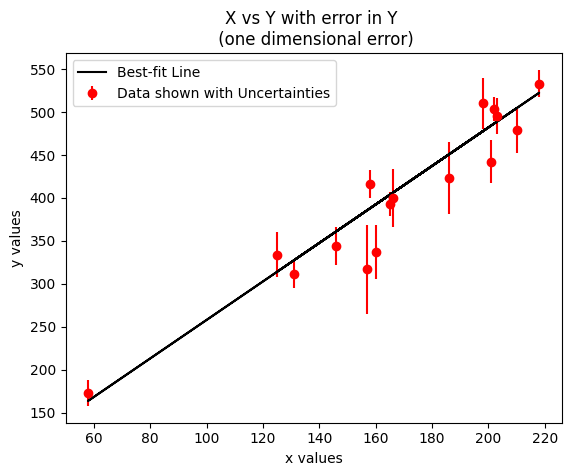

 
slope of the best fit line : 2.2399208553933314 ± 0.12450117233338974
intercept of best fit line : 34.047723577096654 ± 21.07681442070431


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Assuming your data1 has the name data2_q2.txt with address /content/data2_q2.txt
data1 = pd.read_csv('/content/data2_q2.txt',delimiter=' ') #space to denote the separation so delimiter = ' '
#preprocessing the data
#removing the σx ρxy from the data
print(data1)
columns_to_drop = ['σx' , 'ρxy']
data1 = data1.drop(columns=columns_to_drop)
# print(data1) #data without removing first four rows
#rempving the first four rows
data1 = data1.iloc[4:]
#changing its index to 1 again for better processing in the future
data1.reset_index(drop=True, inplace=True)
# print(data1) #data with removing first four rows
#Extracting x, y, and σy values from the data---
x=data1['x']
y=data1['y']
σy=data1['σy']
print(data1)

# Define the linear function
# first paremeter is x coordinate followed by slope and at the last intercept is there
def linear_function(x, m, c):
 return m * x + c
# Perform the curve fit using scipy's curve_fit with method='lm'
params, covariance = curve_fit(linear_function, x, y, sigma=σy, method='lm')
# Extract the best-fit parameters
bestfit_slope, bestfit_incpt = params
# Calculate the uncertainties in the parameters from the covariance matrix
sigma_m, sigma_b = np.sqrt(np.diag(covariance))
# Plot the data and the best-fit line with uncertainties
#fmt ='o' showing that points in error bar represneted as circle
plt.errorbar(x, y, yerr=σy, fmt='o', label='Data shown with Uncertainties',color='red')

plt.plot(x, linear_function(np.array(x), bestfit_slope, bestfit_incpt), label='Best-fit Line',color='k')

#adding labels and legends of the plots
plt.title('X vs Y with error in Y \n (one dimensional error)')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()
# Display the best-fit parameters and their uncertainties
print(f" \nslope of the best fit line : {bestfit_slope} ± {sigma_m}")
print(f"intercept of best fit line : {bestfit_incpt} ± {sigma_b}")

In [ ]:
pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
pip install corner

In [ ]:
pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 1.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


ValueError: too many values to unpack (expected 2)

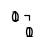

In [ ]:
import numpy as np
import emcee
import corner
from astroML.plotting import plot_mcmc

# Load your data and define your likelihood function here
yerr=σy
# Define the log-likelihood function
def log_likelihood(params, x, y, yerr):
    m, b = params
    model = m * x + b
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

# Define the log-prior function (assuming flat priors)
def log_prior(params):
    m, b = params
    if -100 < m < 100 and -100 < b < 100:
        return 0.0
    return -np.inf

# Define the log-posterior function
def log_probability(params, x, y, yerr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, yerr)

# Set up the initial parameters and walkers
ndim = 2  # number of parameters in the model
nwalkers = 32
nsteps = 1000
pos = np.random.rand(nwalkers, ndim)

# Run the MCMC sampling
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, nsteps)

# Extract the chains
samples = sampler.get_chain()

# Plot the MCMC chains
plot_mcmc(samples, labels=["m", "b"], fig=None)

# Calculate the confidence intervals using the corner module
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
percentiles = [16, 50, 84]
confidence_intervals = corner.quantile(flat_samples, percentiles, axis=0)

# Print the 68% and 95% confidence intervals on m and b
print("68% confidence intervals:")
print("m:", confidence_intervals[1, 0], "-", confidence_intervals[1, 2])
print("b:", confidence_intervals[0, 0], "-", confidence_intervals[0, 2])
print("95% confidence intervals:")
print("m:", confidence_intervals[2, 0], "-", confidence_intervals[2, 2])
print("b:", confidence_intervals[0, 0], "-", confidence_intervals[0, 2])


In [ ]:
import numpy as np
from scipy.stats import norm

# Given data
D_E = 1.61  # Eddington's measurement
sigma_E = 0.40  # Eddington's uncertainty
D_C = 1.98  # Crommelin's measurement
sigma_C = 0.16  # Crommelin's uncertainty
theta_GR = 1.74  # Predicted by General Relativity
theta_NG = 0.87  # Predicted by Newtonian gravity

# Calculate likelihood under General Relativity (GR)
likelihood_GR_E = norm.pdf(D_E, loc=theta_GR, scale=sigma_E)
likelihood_GR_C = norm.pdf(D_C, loc=theta_GR, scale=sigma_C)
likelihood_GR = likelihood_GR_E * likelihood_GR_C

# Calculate likelihood under Newtonian gravity (NG)
likelihood_NG_E = norm.pdf(D_E, loc=theta_NG, scale=sigma_E)
likelihood_NG_C = norm.pdf(D_C, loc=theta_NG, scale=sigma_C)
likelihood_NG = likelihood_NG_E * likelihood_NG_C

# Calculate Bayes factor
bayes_factor = likelihood_GR / likelihood_NG

print("Bayes factor:", bayes_factor)

Bayes factor: 48164622958.34179


100%|██████████| 8000/8000 [00:11<00:00, 699.85it/s]


68% Confidence Intervals:
m = 1.08 + 0.07 - 0.08
b = 212.86 + 14.40 - 13.94
95% Confidence Intervals:
m = 1.08 + 0.15 - 0.15
b = 212.86 + 28.29 - 27.67


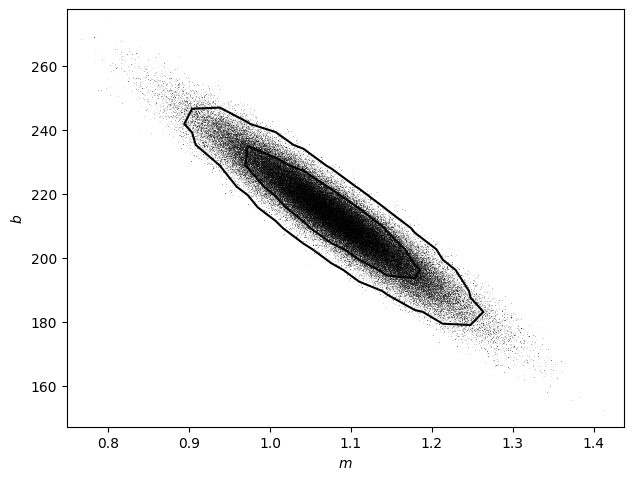

In [ ]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

# Define the model function
def model(params, x):
    m, b = params
    return m * x + b

# Define the log likelihood function
def log_likelihood(params, x, y, yerr):
    m, b = params
    model_vals = model(params, x)
    return -0.5 * np.sum((y - model_vals) ** 2 / yerr ** 2)

# Define the log prior function
def log_prior(params):
    m, b = params
    if -10.0 < m < 10.0 and -1000.0 < b < 1000.0:
        return 0.0
    return -np.inf

# Define the log probability function
def log_probability(params, x, y, yerr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, yerr)

# Load the data
data = np.genfromtxt("/content/data2_q2.txt", names=True)

x = data['x']
y = data['y']
yerr = data['σy']

# Set up the initial parameters
initial_params = np.random.rand(2)

# Set up the emcee sampler
nwalkers = 32
ndim = len(initial_params)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))

# Run the sampler
nsteps = 8000
sampler.run_mcmc(initial_params + 1e-4 * np.random.randn(nwalkers, ndim), nsteps, progress=True)

# Get the chains
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

# Calculate the confidence intervals
m_median, b_median = np.median(samples, axis=0)
m_err_minus, m_err_plus = np.percentile(samples[:, 0], [16, 84])
b_err_minus, b_err_plus = np.percentile(samples[:, 1], [16, 84])

print("68% Confidence Intervals:")
print(f"m = {m_median:.2f} + {m_err_plus - m_median:.2f} - {m_median - m_err_minus:.2f}")
print(f"b = {b_median:.2f} + {b_err_plus - b_median:.2f} - {b_median - b_err_minus:.2f}")
print("95% Confidence Intervals:")
# Calculate the confidence intervals

m_median, b_median = np.median(samples, axis=0)
m_err_minus, m_err_plus = np.percentile(samples[:, 0], [2.5, 97.5])
b_err_minus, b_err_plus = np.percentile(samples[:, 1], [2.5, 97.5])

print(f"m = {m_median:.2f} + {m_err_plus - m_median:.2f} - {m_median - m_err_minus:.2f}")
print(f"b = {b_median:.2f} + {b_err_plus - b_median:.2f} - {b_median - b_err_minus:.2f}")

mu_true, sigma_true = 1000, 15  # stochastic flux model

from astroML.plotting import plot_mcmc
fig = plt.figure()
ax = plot_mcmc(samples.T, fig=fig, labels=[r'$m$', r'$b$'], colors='k')
ax[0].plot(samples[:, 0], samples[:, 1], ',k', alpha=0.1)
ax[0].plot([mu_true], [sigma_true], 'o', color='red', ms=10);

In [ ]:
import emcee
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

    ID    x    y  σy  σx   ρxy
0    1  201  592  61   9 -0.84
1    2  244  401  25   4  0.31
2    3   47  583  38  11  0.64
3    4  287  402  15   7 -0.27
4    5  203  495  21   5 -0.33
5    6   58  173  15   9  0.67
6    7  210  479  27   4 -0.02
7    8  202  504  14   4 -0.05
8    9  198  510  30  11 -0.84
9   10  158  416  16   7 -0.69
10  11  165  393  14   5  0.30
11  12  201  442  25   5 -0.46
12  13  157  317  52   5 -0.03
13  14  131  311  16   6  0.50
14  15  166  400  34   6  0.73
15  16  160  337  31   5 -0.52
16  17  186  423  42   9  0.90
17  18  125  334  26   8  0.40
18  19  218  533  16   6 -0.78
19  20  146  344  22   5 -0.56
    ID    x    y  σy
0    5  203  495  21
1    6   58  173  15
2    7  210  479  27
3    8  202  504  14
4    9  198  510  30
5   10  158  416  16
6   11  165  393  14
7   12  201  442  25
8   13  157  317  52
9   14  131  311  16
10  15  166  400  34
11  16  160  337  31
12  17  186  423  42
13  18  125  334  26
14  19  218  533  16
15  20  146  

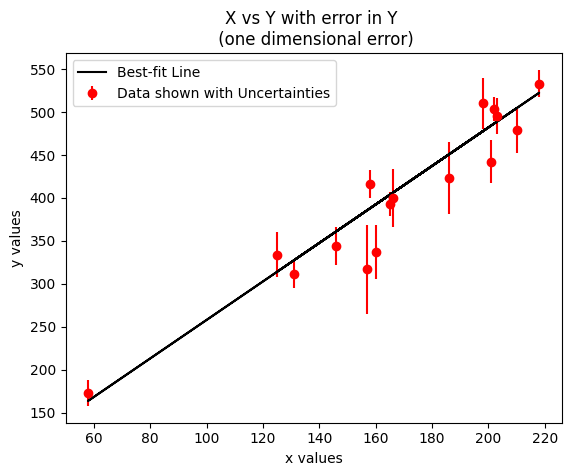

 
slope of the best fit line : 2.2399208553933314 ± 0.12450117233338974
intercept of best fit line : 34.047723577096654 ± 21.07681442070431


AttributeError: Polygon.set() got an unexpected keyword argument 'normed'

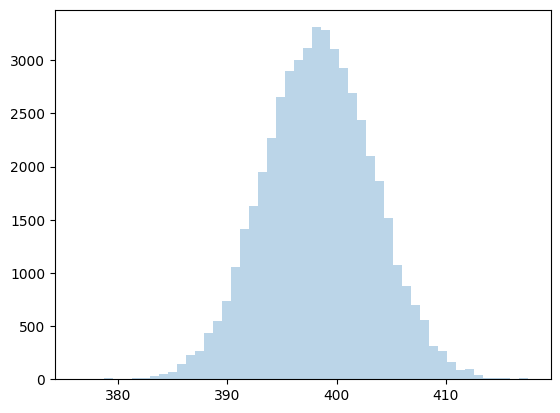

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Assuming your data1 has the name data2_q2.txt with address /content/data2_q2.txt
data1 = pd.read_csv('/content/data2_q2.txt',delimiter=' ') #space to denote the separation so delimiter = ' '
#preprocessing the data
#removing the σx ρxy from the data
print(data1)
columns_to_drop = ['σx' , 'ρxy' ,'σx']
data1 = data1.drop(columns=columns_to_drop)
# print(data1) #data without removing first four rows
#rempving the first four rows
data1 = data1.iloc[4:]
#changing its index to 1 again for better processing in the future
data1.reset_index(drop=True, inplace=True)
# print(data1) #data with removing first four rows
#Extracting x, y, and σy values from the data---
x=data1['x']
y=data1['y']
σy=data1['σy']
print(data1)

# Define the linear function
# first paremeter is x coordinate followed by slope and at the last intercept is there
def linear_function(x, m, c):
 return m * x + c
# Perform the curve fit using scipy's curve_fit with method='lm'
params, covariance = curve_fit(linear_function, x, y, sigma=σy, method='lm')
# Extract the best-fit parameters
bestfit_slope, bestfit_incpt = params
# Calculate the uncertainties in the parameters from the covariance matrix
sigma_m, sigma_b = np.sqrt(np.diag(covariance))
# Plot the data and the best-fit line with uncertainties
#fmt ='o' showing that points in error bar represneted as circle
plt.errorbar(x, y, yerr=σy, fmt='o', label='Data shown with Uncertainties',color='red')

plt.plot(x, linear_function(np.array(x), bestfit_slope, bestfit_incpt), label='Best-fit Line',color='k')

#adding labels and legends of the plots
plt.title('X vs Y with error in Y \n (one dimensional error)')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()
# Display the best-fit parameters and their uncertainties
print(f" \nslope of the best fit line : {bestfit_slope} ± {sigma_m}")
print(f"intercept of best fit line : {bestfit_incpt} ± {sigma_b}")

def log_prior(theta):
    return 1  # flat prior

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# we'll start at random locations between 0 and 2000
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[y, σy])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, normed=True)

# plot a best-fit Gaussian
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); plt.ylabel("P(F)")

#question -3

    ID    x    y  σy  σx   ρxy
0    1  201  592  61   9 -0.84
1    2  244  401  25   4  0.31
2    3   47  583  38  11  0.64
3    4  287  402  15   7 -0.27
4    5  203  495  21   5 -0.33
5    6   58  173  15   9  0.67
6    7  210  479  27   4 -0.02
7    8  202  504  14   4 -0.05
8    9  198  510  30  11 -0.84
9   10  158  416  16   7 -0.69
10  11  165  393  14   5  0.30
11  12  201  442  25   5 -0.46
12  13  157  317  52   5 -0.03
13  14  131  311  16   6  0.50
14  15  166  400  34   6  0.73
15  16  160  337  31   5 -0.52
16  17  186  423  42   9  0.90
17  18  125  334  26   8  0.40
18  19  218  533  16   6 -0.78
19  20  146  344  22   5 -0.56
    ID    x    y  σy
0    1  201  592  61
1    2  244  401  25
2    3   47  583  38
3    4  287  402  15
4    5  203  495  21
5    6   58  173  15
6    7  210  479  27
7    8  202  504  14
8    9  198  510  30
9   10  158  416  16
10  11  165  393  14
11  12  201  442  25
12  13  157  317  52
13  14  131  311  16
14  15  166  400  34
15  16  160  

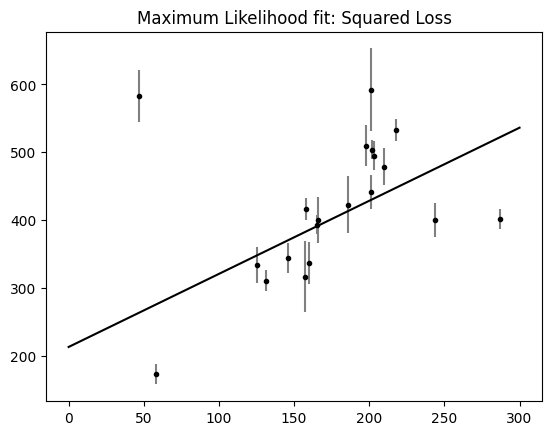

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Assuming your data1 has the name data2_q2.txt with address /content/data2_q2.txt
data1 = pd.read_csv('/content/data2_q2.txt',delimiter=' ') #space to denote the separation so delimiter = ' '
#preprocessing the data
#removing the σx ρxy from the data
print(data1)
columns_to_drop = ['σx' , 'ρxy']
data1 = data1.drop(columns=columns_to_drop)
# print(data1) #data without removing first four rows

#changing its index to 1 again for better processing in the future
data1.reset_index(drop=True, inplace=True)
# print(data1) #data with removing first four rows
#Extracting x, y, and σy values from the data---
x=data1['x']
y=data1['y']
σy=data1['σy']
print(data1)

from scipy import optimize

def squared_loss(theta, x=x, y=y, e=σy):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)

xfit = np.linspace(0, 300)
plt.errorbar(x, y, σy , fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, '-k')
plt.title('Maximum Likelihood fit: Squared Loss');



    ID    x    y  σy  σx   ρxy
0    1  201  592  61   9 -0.84
1    2  244  401  25   4  0.31
2    3   47  583  38  11  0.64
3    4  287  402  15   7 -0.27
4    5  203  495  21   5 -0.33
5    6   58  173  15   9  0.67
6    7  210  479  27   4 -0.02
7    8  202  504  14   4 -0.05
8    9  198  510  30  11 -0.84
9   10  158  416  16   7 -0.69
10  11  165  393  14   5  0.30
11  12  201  442  25   5 -0.46
12  13  157  317  52   5 -0.03
13  14  131  311  16   6  0.50
14  15  166  400  34   6  0.73
15  16  160  337  31   5 -0.52
16  17  186  423  42   9  0.90
17  18  125  334  26   8  0.40
18  19  218  533  16   6 -0.78
19  20  146  344  22   5 -0.56
0     201
1     244
2      47
3     287
4     203
5      58
6     210
7     202
8     198
9     158
10    165
11    201
12    157
13    131
14    166
15    160
16    186
17    125
18    218
19    146
Name: x, dtype: int64
0     592
1     401
2     583
3     402
4     495
5     173
6     479
7     504
8     510
9     416
10    393
11    442
12    3

<ipython-input-33-76dd601531f0>:50: RuntimeWarning: divide by zero encountered in log
  logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
<ipython-input-33-76dd601531f0>:49: RuntimeWarning: divide by zero encountered in log
  logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2


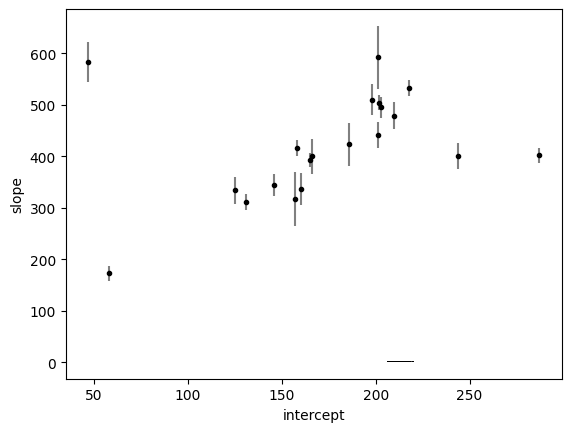

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Assuming your data1 has the name data2_q2.txt with address /content/data2_q2.txt
data1 = pd.read_csv('/content/data2_q2.txt',delimiter=' ') #space to denote the separation so delimiter = ' '
#preprocessing the data
#removing the σx ρxy from the data
print(data1)
columns_to_drop = ['σx' , 'ρxy']
data1 = data1.drop(columns=columns_to_drop)
# print(data1) #data without removing first four rows

#changing its index to 1 again for better processing in the future
# data1.reset_index(drop=True, inplace=True)
# print(data1) #data with removing first four rows
#Extracting x, y, and σy values from the data---
x=data1['x']
y=data1['y']
e=data1['σy']
# theta will be an array of length 2 + N, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope,
# and theta[2 + i] is the weight g_i
print(x)
print(y)
print(e)

from scipy import optimize

def squared_loss(theta, x=x, y=y, e=e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)
def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

xfit = np.linspace(0, 300)
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')

def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

# Note that this step will take a few minutes to run!

ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 1500  # number of MCMC steps to take

# set theta near the maximum likelihood, with
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

0     61
1     25
2     38
3     15
4     21
5     15
6     27
7     14
8     30
9     16
10    14
11    25
12    52
13    16
14    34
15    31
16    42
17    26
18    16
19    22
Name: σy, dtype: int64


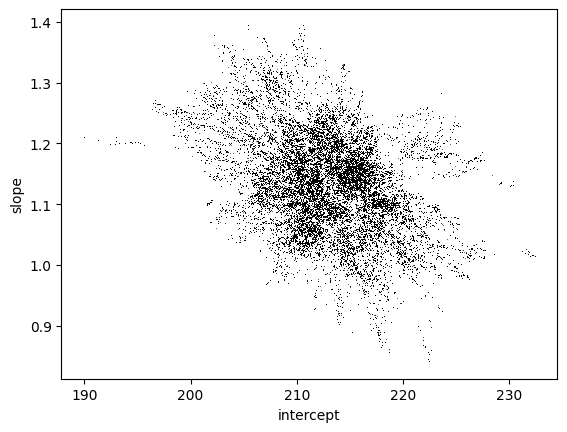

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
from scipy.optimize import minimize

# Assuming your data1 has the name data2_q2.txt with address /content/data2_q2.txt
data1 = pd.read_csv('/content/data2_q2.txt', delimiter=' ')  # space to denote the separation so delimiter = ' '
# preprocessing the data
# removing the σx ρxy from the data
columns_to_drop = ['σx', 'ρxy']
data1 = data1.drop(columns=columns_to_drop)

# Extracting x, y, and σy values from the data---
x = data1['x']
y = data1['y']
e = data1['σy']

print(e)
def squared_loss(theta, x, y, e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)


theta1 = minimize(squared_loss, [0, 0], args=(x, y, e)).x


def log_prior(theta):
    # g_i needs to be between 0 and 1
    if np.all((theta[2:] > 0) & (theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf


def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    # g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    g = np.clip(theta[2:], 1e-10, 1-1e-10)  # Clip values to avoid NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))


def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)


ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 5000  # number of MCMC steps to take

# set theta near the maximum likelihood, with
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, e, 50))
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.6)
plt.xlabel('intercept')
plt.ylabel('slope')
plt.show()


Text(0, 0.5, 'Y')

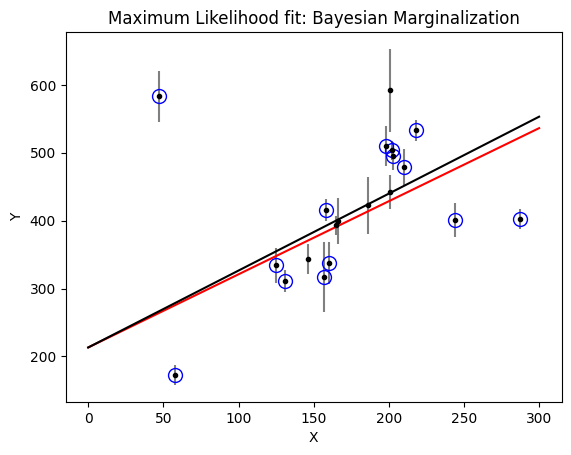

In [ ]:
theta3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)
xfit = np.linspace(0, 300)

plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='red',label='')
# plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightgray')
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black',label='Maximum liklihood')
plt.plot(x[outliers], y[outliers], 'ro', ms=10, mfc='none', mec='blue')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');
plt.xlabel("X")
plt.ylabel("Y")